In [5]:
import itertools  
import os
import re
import sys

import matplotlib.pyplot as plt
%matplotlib inline

import tellurium as te
import tesbml

#import libsbml as libsbml
import roadrunner
import networkx as nx

In [6]:
# constants
EMPTYSET = 'EmptySet'
PATTERN = r'[A-Z0-9a-z_]{1,}'
REGEX = re.compile(PATTERN)

In [7]:
current_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir, 'curated_data'))

In [8]:
def mass_flow_checker(num, no_model, null_g, dis_g):
    
    """
    Using the number (order) of a .XML model file,
    updates three lists - no_model, null_g, and dis_g
    
    Parameters:
    -----------
    num: integer between 1 and 706 (except 596)
         Number of curated .XML file
    no_model: list of strings
         Names of non existing models
    null_g: list of strings
         Names of null graphs (no nodes is connected)
    dis_g:  list of strings
         Names of weakly disconnected graphs
    
    Returns:
    -----------
    None but no_model, null_g, dis_g are updated
    """
    
    format_num = format(num, '03d')
    reader = libsbml.SBMLReader()
    document = reader.readSBML(os.path.join(data_dir, 'curated_' + format_num + '.xml'))
    model = document.getModel()
    
    if model == None:
        no_model.append(format_num)
        return
    
    graph_list = []
    for i in range(model.getNumReactions()):
        reaction = model.getReaction(i)
    
        list_reactants = []
        for j in range(reaction.getNumReactants()):
            species = reaction.getReactant(j).getSpecies()
            if species != EMPTYSET:
                list_reactants.append(species)

        list_products = []
        for k in range(reaction.getNumProducts()):
            species = reaction.getProduct(k).getSpecies()
            if species != EMPTYSET:
                list_products.append(species)

        graph_list = graph_list + list((itertools.product(list_reactants, list_products)))

    G = nx.Graph()
    G.add_edges_from(graph_list)
    
    # if the graph is null, i.e. each reactant/product is separate
    if nx.number_of_nodes(G) == 0:
        null_g.append(format_num)
    elif nx.is_connected(G) == False:
        dis_g.append(format_num)

In [9]:
def display_statistics():
    
    """
    Runs graph_checker from 1 to 706 (except 596)
    and displays results and plots a bar graph
    
    Parameters:
    -----------
    None
    
    Returns:
    -----------
    null_graphs:disconnected_graphs, and wrong_format
    
    Displays a plot
    """
    
    wrong_format = []
    null_graphs = []
    disconnected_graphs = []
    run_list = set(range(1, 707)).difference({596})

    for i in run_list:
        mass_flow_checker(i, wrong_format, null_graphs, disconnected_graphs)

    print("Number of null graphs: ", len(null_graphs))
    print("Number of disconnected graphs: ", len(disconnected_graphs))
    print("Finally, number of wrong formats(no models retrieved): ", len(wrong_format))
    print(wrong_format)
    
    bar_val = [707-len(null_graphs)-len(disconnected_graphs)-len(wrong_format),
              len(null_graphs), len(disconnected_graphs), len(wrong_format)]
    x_cat = ["Correct Models(" + str(bar_val[0]) + ")", 
             "No Graph(" + str(bar_val[1]) + ")",
             "Disconnected Graphs(" + str(bar_val[2]) + ")",
             "Couldn't Load(" + str(bar_val[3]) + ")"]
    plt.figure(figsize=(10,5))
    plt.title("Summary Statistics: Graph Checker")
    plt.bar(x_cat, bar_val, width=0.5)

Number of null graphs:  164
Number of disconnected graphs:  166
Finally, number of wrong formats(no models retrieved):  3
['649', '694', '701']


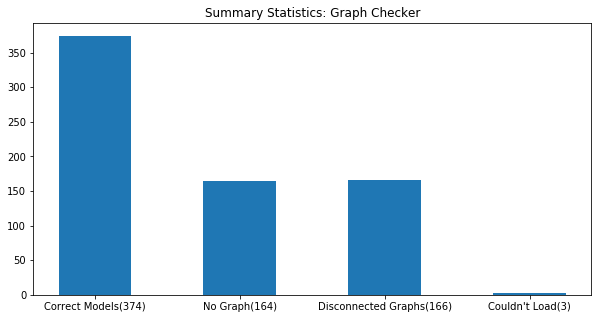

In [5]:
display_statistics()

# Error message for #596 to read file

libc++abi.dylib: terminating with uncaught exception of type std::out_of_range
[I 20:36:03.411 LabApp] KernelRestarter: restarting kernel (1/5)
kernel ff5ca5cd-e457-4353-9b7a-d80ef8ba0236 restarted

# Error message for #649, #694, #701: model doesn't exist or format is wrong

In [ ]:
def graph_checker(num, no_model, null_g, dis_g):
    
    """
    Using the number (order) of a .XML model file,
    updates three lists - no_model, null_g, and dis_g
    
    Parameters:
    -----------
    num: integer between 1 and 706 (except 596)
         Number of curated .XML file
    no_model: list of strings
         Names of non existing models
    null_g: list of strings
         Names of null graphs (no nodes is connected)
    dis_g: list of strings
         Names of weakly disconnected graphs
    
    Returns:
    -----------
    None but no_model, null_g, dis_g are updated
    """
    
    format_num = format(num, '03d')
    reader = libsbml.SBMLReader()
    document = reader.readSBML(os.path.join(data_dir, 'curated_' + format_num + '.xml'))
    model = document.getModel()
    
    if model == None:
        no_model.append(format_num)
        return
    
    graph_list = []
    for i in range(model.getNumReactions()):
        reaction = model.getReaction(i)
    
        list_reactants = []
        for j in range(reaction.getNumReactants()):
            species = reaction.getReactant(j).getSpecies()
            if species != EMPTYSET:
                list_reactants.append(species)

        list_products = []
        for k in range(reaction.getNumProducts()):
            species = reaction.getProduct(k).getSpecies()
            if species != EMPTYSET:
                list_products.append(species)

        graph_list = graph_list + list((itertools.product(list_reactants, list_products)))

    G = nx.Graph()
    G.add_edges_from(graph_list)
    
    # if the graph is null, i.e. each reactant/product is separate
    if nx.number_of_nodes(G) == 0:
        null_g.append(format_num)
    elif nx.is_connected(G) == False:
        dis_g.append(format_num)

In [47]:
# Read the model through 
reader = libsbml.SBMLReader()
document = reader.readSBML(os.path.join(data_dir, 'curated_001.xml'))
model = document.getModel()

numreaction = model.getNumReactions()
for i in range(numreaction):
    reaction = model.getReaction(i)
    stg = " "
    
    # print reactants - left hand side of the reaction
    for j in range(reaction.getNumReactants()):
        reactant = reaction.getReactant(j)
        stg = stg + " " + reactant.getSpecies()
        
    stg = stg + " -> "
    
    # print products - right hand side of the reaction
    for k in range(reaction.getNumProducts()):
        product = reaction.getProduct(k)
        stg = stg + " " + product.getSpecies()
    
    stg = stg + ";"
    
    print(stg)

  B ->  BL;
  BL ->  BLL;
  BLL ->  ALL;
  A ->  AL;
  AL ->  ALL;
  B ->  A;
  BL ->  AL;
  I ->  IL;
  IL ->  ILL;
  A ->  I;
  AL ->  IL;
  ALL ->  ILL;
  D ->  DL;
  DL ->  DLL;
  I ->  D;
  IL ->  DL;
  ILL ->  DLL;


In [9]:
dummy_r = te.loada("""
    J1: S1 -> S2; v0
    v0 = 10
    """)

In [10]:
dummy_a = dummy_r.simulate(0, 100, 50)
dummy_a

       time,     [S1],    [S2]
 [[       0,        0,       0],
  [ 2.04082, -20.4082, 20.4082],
  [ 4.08163, -40.8163, 40.8163],
  [ 6.12245, -61.2245, 61.2245],
  [ 8.16327, -81.6327, 81.6327],
  [ 10.2041, -102.041, 102.041],
  [ 12.2449, -122.449, 122.449],
  [ 14.2857, -142.857, 142.857],
  [ 16.3265, -163.265, 163.265],
  [ 18.3673, -183.673, 183.673],
  [ 20.4082, -204.082, 204.082],
  [  22.449,  -224.49,  224.49],
  [ 24.4898, -244.898, 244.898],
  [ 26.5306, -265.306, 265.306],
  [ 28.5714, -285.714, 285.714],
  [ 30.6122, -306.122, 306.122],
  [ 32.6531, -326.531, 326.531],
  [ 34.6939, -346.939, 346.939],
  [ 36.7347, -367.347, 367.347],
  [ 38.7755, -387.755, 387.755],
  [ 40.8163, -408.163, 408.163],
  [ 42.8571, -428.571, 428.571],
  [  44.898,  -448.98,  448.98],
  [ 46.9388, -469.388, 469.388],
  [ 48.9796, -489.796, 489.796],
  [ 51.0204, -510.204, 510.204],
  [ 53.0612, -530.612, 530.612],
  [  55.102,  -551.02,  551.02],
  [ 57.1429, -571.429, 571.429],
  [ 59.1837,